#Project Work Flow
1. Data Import
2. Data Exploration
       Visualization
       barchart
       pairplots
       correlation
3. Data Cleaning
       Missing or Null Data points
       Unexpected Outliers
4. Feature Engineering
       Scaling
          Normalize
          Min_max

5. Model Selection
    Train/Test Split(TSNE:visualization)
    MODELS
       KNN
       LogisticRegression
       SVM
       DecisionTreeClassifier
       Naive Bayes Classifier
       
      
6. Feature Selection
       PCA
       Autoencoder
       FILTER
       WRAPPER
7. Ensemble techniques
       Bagging
       Random forest
       adaboost
       gradboost
       voting
8. HYPER Parameter Tuning
       GRID SEARCHCV
9.Conclusion


In [144]:
import warnings
warnings.filterwarnings('ignore')

**1. Data Import**


In [145]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.decomposition import PCA


# from sklearn.neural_network import MLPClassifier

In [146]:
data = pd.read_csv('./MCSDatasetNEXTCONLab.csv')

**2. Data Exploration**

     Visualization
     barchart
     pairplots
     correlation


In [147]:
data.describe()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
count,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000
mean,2009.362745,45.484035,-75.217603,2.513946,12.348177,29.480185,44.219829,27.109914,5.838097,65.292184,0.182822,199039.373239,0.869028
std,1164.521555,0.058989,0.054501,1.704509,6.538839,17.353324,14.511027,14.993890,2.878052,20.311306,0.386534,101695.208646,0.337381
min,1.000000,45.365600,-75.334116,0.000000,0.000000,0.000000,10.000000,10.000000,1.000000,30.000000,0.000000,-9363.000000,0.000000
25%,989.000000,45.434521,-75.264506,1.000000,7.000000,14.000000,30.000000,10.000000,3.000000,48.000000,0.000000,112621.000000,1.000000
50%,2025.000000,45.484917,-75.220013,2.000000,13.000000,29.000000,50.000000,20.000000,6.000000,65.000000,0.000000,197082.000000,1.000000
75%,3011.000000,45.541527,-75.173048,4.000000,18.000000,45.000000,60.000000,40.000000,8.000000,82.000000,0.000000,300297.000000,1.000000
max,4000.000000,45.584678,-75.088915,6.000000,23.000000,59.000000,60.000000,60.000000,10.000000,100.000000,1.000000,375388.000000,1.000000


###Location of tasks are specified by ’latitude’ and ’longitude’ together.

###day,hour and minute: describe the task publish time.

###Duration denotes task active duration in terms of minutes.

###Remaining time: denotes the residual time of a sensing task till its completion.


###Resources:given(description unknown)

###Coverage: denotes task sensing distance.

###OnpeakHour: is a binary flag to indicate if taskstart time occurs during 7am to 11am. We define 7am to 11am as the peak hour and other hours are non-peak for the sake of simplicity in simulations.

###GridNumber: is obtained by splitting sensing city map to small grids with numbers beginning at 1.

###Legitimacy: describes whether a task is illegitimate one or legitimate one. 


 

In [148]:
data.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14484 non-null  int64  
 1   Latitude       14484 non-null  float64
 2   Longitude      14484 non-null  float64
 3   Day            14484 non-null  int64  
 4   Hour           14484 non-null  int64  
 5   Minute         14484 non-null  int64  
 6   Duration       14484 non-null  int64  
 7   RemainingTime  14484 non-null  int64  
 8   Resources      14484 non-null  int64  
 9   Coverage       14484 non-null  int64  
 10  OnPeakHours    14484 non-null  int64  
 11  GridNumber     14484 non-null  int64  
 12  Ligitimacy     14484 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.4 MB


### Location to name conversion

In [150]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
# import module
from geopy.geocoders import Nominatim


In [152]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")


In [153]:
# Latitude & Longitude input
Latitude_min = "45.3656009"
Longitude_min= "-75.217603"
Latitude_max= "45.584678"
Longitude_max= "-75.088915"
location1 = geolocator.reverse(Latitude_min+","+Longitude_min)
location2 = geolocator.reverse(Latitude_min+","+Longitude_max)
location3 = geolocator.reverse(Latitude_max+","+Longitude_min)
location4 = geolocator.reverse(Latitude_max+","+Longitude_max)

# Display
print("Four corners between which data is collected\n")
print(location1)
print(location2)
print(location3)
print(location4)

Four corners between which data is collected

The Nation, Prescott and Russell Counties, Eastern Ontario, Ontario, Canada
Lemieux Road, The Nation, Prescott and Russell Counties, Eastern Ontario, Ontario, K0A 1M0, Canada
2937, Old Highway 17, Clarence-Rockland, Prescott and Russell Counties, Eastern Ontario, Ontario, K4K 1K7, Canada
Alfred and Plantagenet, Prescott and Russell Counties, Eastern Ontario, Ontario, Canada


### HISTOGRAMS for distribution of data

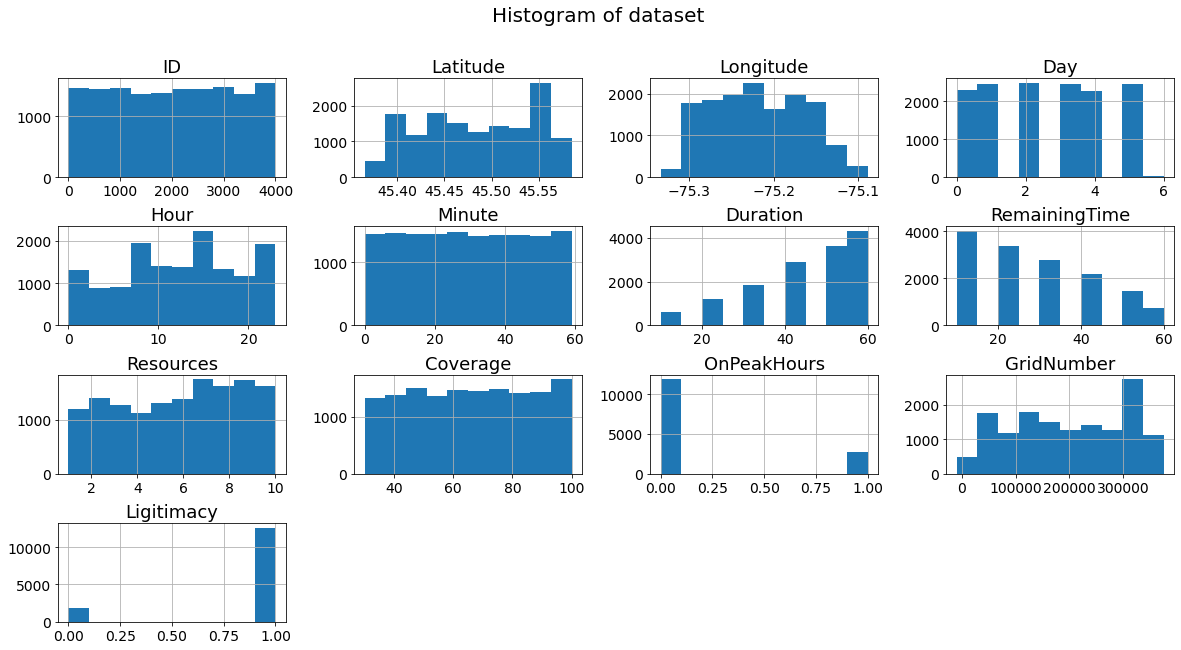

In [154]:
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)
data.hist(figsize=(20,10),bins=10)
plt.suptitle("Histogram of dataset",fontsize='20')
plt.subplots_adjust(hspace=0.5)
plt.show()

**3. Data Cleaning**

     Missing or Null Data points
      Unexpected Outliers


### null values

In [155]:
print("NULL VALUES in DATASET \n")
print(data.isnull().sum(axis = 0))

NULL VALUES in DATASET 

ID               0
Latitude         0
Longitude        0
Day              0
Hour             0
Minute           0
Duration         0
RemainingTime    0
Resources        0
Coverage         0
OnPeakHours      0
GridNumber       0
Ligitimacy       0
dtype: int64


In [156]:
## Checking if dataset contains any null

nan_values = data.isna()
nan_columns = nan_values.any()

columns_with_nan = data.columns[nan_columns].tolist()
print("Number of columns with null values= ",len(columns_with_nan))

Number of columns with null values=  0


***4. Feature Engineering***

          Scaling
             Normalize
             Min_max



### Normalization

$x ′ = \frac{( x − x_ {m i n })}{( x_{m a x} − x_{m i n})}$

In [157]:

# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data_t = trans.fit_transform(data)

In [158]:
# convert the array back to a dataframe
data_norm = pd.DataFrame(data_t,columns =data.columns)
# summarize
data_norm.describe()


,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
count,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000
mean,0.502216,0.540608,0.475173,0.418991,0.536877,0.499664,0.684397,0.342198,0.537566,0.504174,0.182822,0.541655,0.869028
std,0.291203,0.269262,0.222272,0.284085,0.284297,0.294124,0.290221,0.299878,0.319784,0.290162,0.386534,0.264314,0.337381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.247062,0.314596,0.283891,0.166667,0.304348,0.237288,0.400000,0.000000,0.222222,0.257143,0.000000,0.317047,1.000000
50%,0.506127,0.544633,0.465343,0.333333,0.565217,0.491525,0.800000,0.200000,0.555556,0.500000,0.000000,0.536568,1.000000
75%,0.752688,0.803032,0.656883,0.666667,0.782609,0.762712,1.000000,0.600000,0.777778,0.742857,0.000000,0.804832,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### BOX PLOTS for OUTLIERS

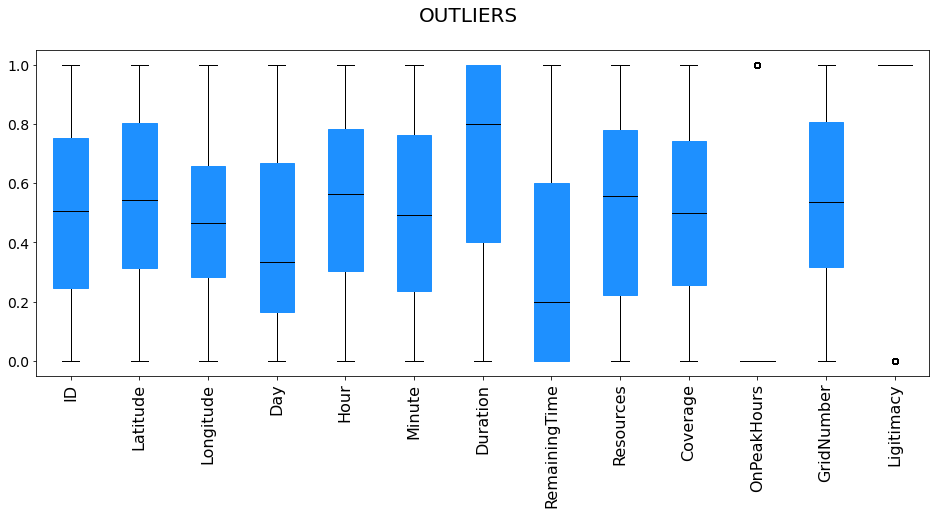

In [159]:
df = pd.DataFrame(data_norm, columns = list(data_norm.columns.values))
props = dict(boxes="dodgerblue", whiskers="black", medians="black", caps="black")
df.plot.box(color=props, patch_artist=True,figsize=(16, 6))
plt.suptitle("OUTLIERS",fontsize="20")
plt.xticks(rotation=90,fontsize="16")
plt.show()

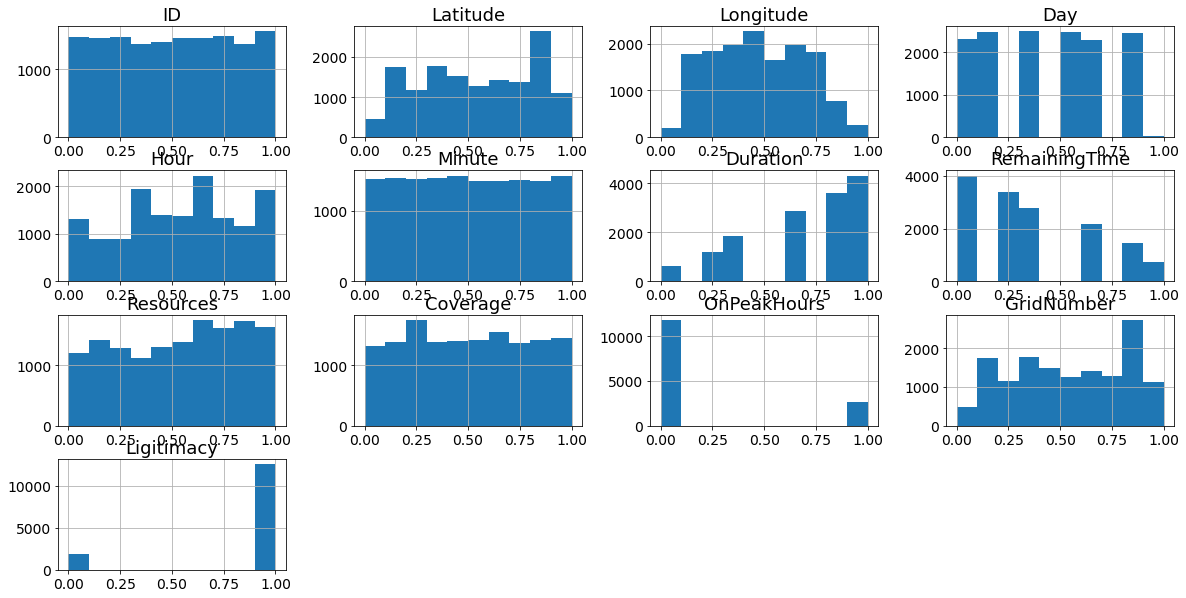

In [160]:
# histograms of the variables
data_norm.hist(figsize=(20,10),bins=10)
plt.show()

### Standarization

$x ′ = \frac{( x − μ)}{σ}$

In [161]:
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data_t = trans.fit_transform(data)
# convert the array back to a dataframe
data_standard = pd.DataFrame(data_t,columns =data.columns)
# summarize
data_standard.describe()


,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
count,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04,1.448400e+04
mean,6.279306e-17,-6.679563e-14,-2.101968e-13,3.924566e-18,1.226427e-16,-1.000764e-16,5.690621e-17,7.456676e-17,-5.886850e-17,4.905708e-17,-1.790583e-17,-3.433996e-17,-6.475534e-17
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.724684e+00,-2.007809e+00,-2.137874e+00,-1.474931e+00,-1.888501e+00,-1.698879e+00,-2.358276e+00,-1.141165e+00,-1.681090e+00,-1.737623e+00,-4.729950e-01,-2.049355e+00,-2.575891e+00
25%,-8.762379e-01,-8.394045e-01,-8.606081e-01,-8.882317e-01,-8.179376e-01,-8.920896e-01,-9.799664e-01,-1.141165e+00,-9.861515e-01,-8.513870e-01,-4.729950e-01,-8.498076e-01,3.882152e-01
50%,1.342851e-02,1.494772e-02,-4.422814e-02,-3.015321e-01,9.968822e-02,-2.767203e-02,3.983433e-01,-4.742038e-01,5.625624e-02,-1.438581e-02,-4.729950e-01,-1.924811e-02,3.882152e-01
75%,8.601574e-01,9.746381e-01,8.175390e-01,8.718670e-01,8.643764e-01,8.943734e-01,1.087498e+00,8.597189e-01,7.511947e-01,8.226154e-01,-4.729950e-01,9.957315e-01,3.882152e-01
max,1.709463e+00,1.706173e+00,2.361274e+00,2.045266e+00,1.629065e+00,1.701163e+00,1.087498e+00,2.193642e+00,1.446133e+00,1.708852e+00,2.114187e+00,1.734150e+00,3.882152e-01


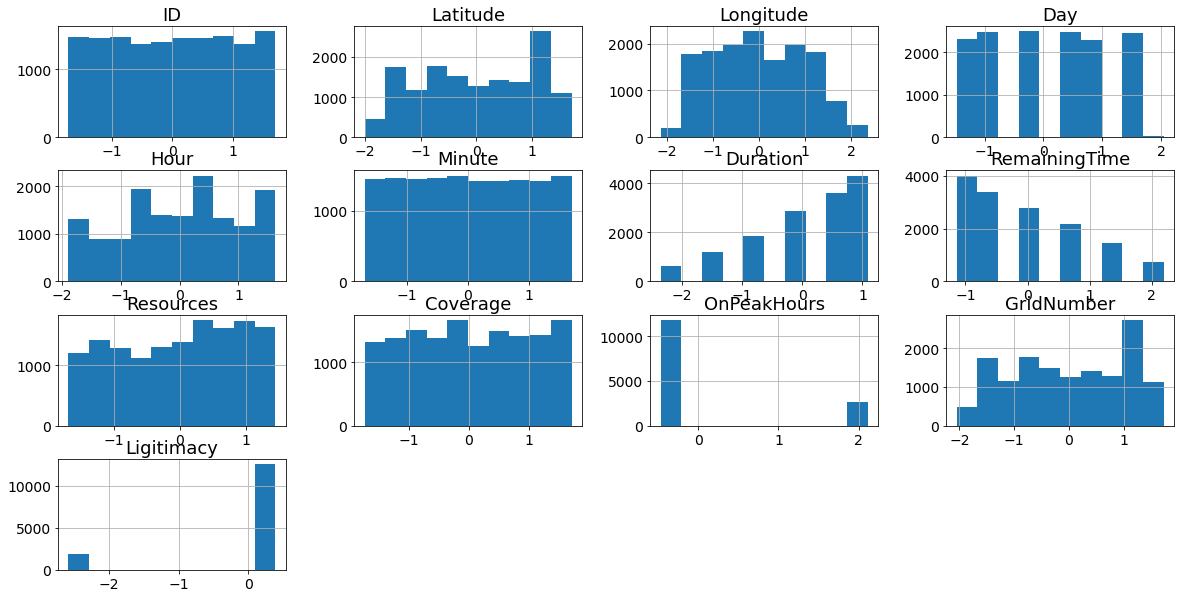

In [162]:
# histograms of the variables
data_standard.hist(figsize=(20,10),bins=10)
plt.show()

###Normalised data is used asmost of the columns are not having gaussian distribution

***5.Model Selection***

    Evaluation Methods
     Train/Test Split(TSNE:visualization)
    K-Fold Cross-Validation
    MODELS
       KNN
       LogisticRegression
      SVM
      DecisionTreeClassifier
      Naive Bayes Classifier
      Random Forest
      Ensemble techniques


In [163]:
train_data=data[data.Day<5]
test_data=data[data.Day>4]

In [164]:
train_data = train_data.drop(["Day","ID"], axis='columns')
test_data = test_data.drop(["Day","ID" ],axis='columns')

In [165]:
trans = MinMaxScaler()
data_train = trans.fit_transform(train_data)
data_test = trans.fit_transform(test_data)

In [166]:
# convert the array back to a dataframe
train_input = pd.DataFrame(data_train,columns =train_data.columns)
test_input = pd.DataFrame(data_test,columns =test_data.columns)


In [167]:
#train data for days < 5
#train_input=data_norm[data.Day<5]

x_train=train_input.iloc[:,:-1]
y_train=train_input.iloc[ :, -1:]
#train data for days>4
#test_input =data_norm[(data.Day>4)]

x_test=test_input.iloc[:,:-1]
y_test=test_input.iloc[ :, -1:]

In [168]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(11994, 10)
(11994, 1)
(2490, 10)
(2490, 1)


In [169]:
#apply TSNE on training data
x_train_tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300,random_state=24).fit_transform(x_train) 

In [170]:
#apply TSNE on testing data
x_test_tsne=TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300,random_state=24).fit_transform(x_test)


In [27]:
#use KMeans clusteringr on TSNE training data and test data

# tree.fit(x_train_tsne,y_train)
# pred_train = tree.predict(x_train_tsne)
# pred_test = tree.predict(x_test_tsne)

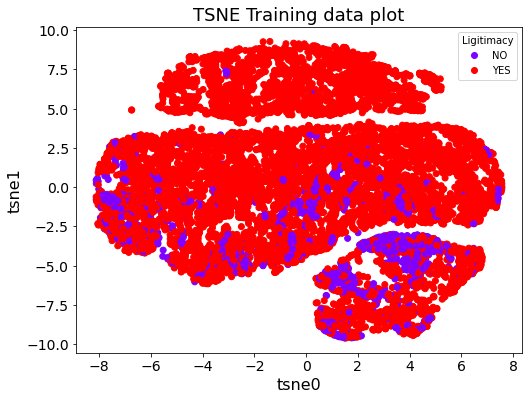

In [171]:
#plot Actual vs Predicted classes in training data
plt.subplots(figsize=(8,6))
col = np.where(y_train==0,'r','b')
train_col=y_train.to_numpy()
scatter=plt.scatter(x=x_train_tsne[:, 0], y=x_train_tsne[:, 1],c=train_col,cmap='rainbow')
plt.title('TSNE Training data plot',fontsize=18)
plt.xlabel("tsne0",fontsize=16)
plt.ylabel("tsne1",fontsize=16)
plt.legend(handles=scatter.legend_elements()[0], labels=['NO','YES'],title="Ligitimacy")
plt.show()

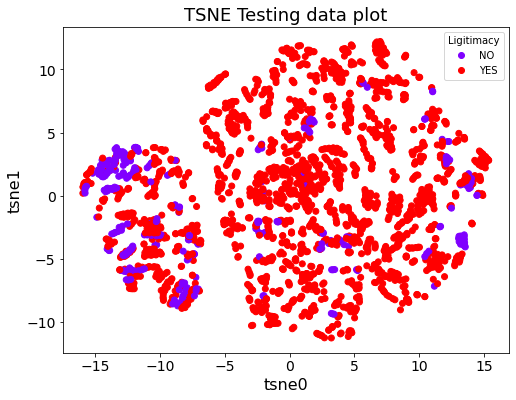

In [172]:
#plot Actual vs Predicted classes in testing data
plt.subplots(figsize=(8,6))
test_col=y_test.to_numpy()
scatter=plt.scatter(x=x_test_tsne[:, 0], y=x_test_tsne[:, 1],c=test_col,cmap='rainbow')
plt.title('TSNE Testing data plot',fontsize=18)
plt.xlabel("tsne0",fontsize=16)
plt.ylabel("tsne1",fontsize=16)
plt.legend(handles=scatter.legend_elements()[0], labels=['NO','YES'],title="Ligitimacy")
plt.show()


### Baseline Accuracies for ML Models



The accuracy of model KNeighborsClassifier is 88.88


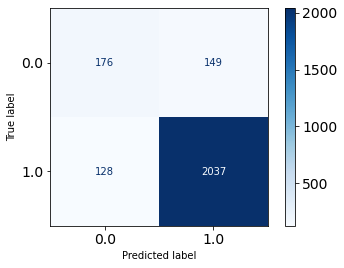



The accuracy of model SVC is 86.95


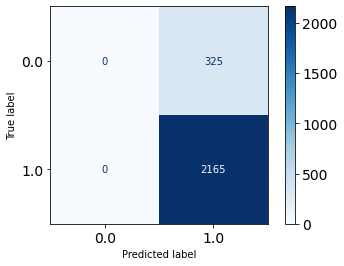



The accuracy of model LogisticRegression is 86.75


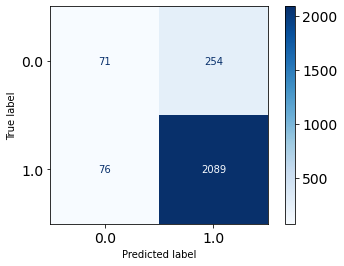



The accuracy of model DecisionTreeClassifier is 91.37


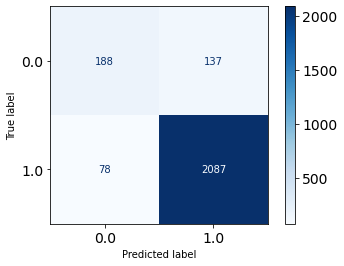



The accuracy of model GaussianNB is 84.38


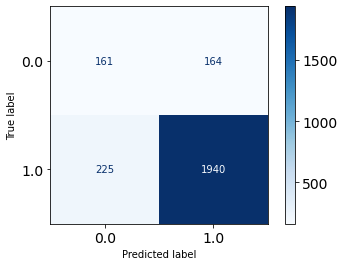

In [173]:

knn= KNeighborsClassifier()
logistic = LogisticRegression()
svm = svm.SVC(kernel='linear')
tree= DecisionTreeClassifier(random_state=24) 
naive_bayes = GaussianNB()
baseline_accuracy=np.empty(5, dtype=float)


# now, create a list with the objects 
models= [knn,svm,logistic,tree,naive_bayes]
for i,model in enumerate(models):
    model.fit(x_train, y_train.values.ravel()) # fit the model
    y_pred= model.predict(x_test) # then predict on the test set
    accuracy= accuracy_score(y_test, y_pred)*100 # this gives us how often the algorithm predicted correctly
    baseline_accuracy[i]=accuracy
    print("\n")
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.2f}")
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
    plt.show()
    

In [174]:
print("BASELINE ACCURACIES",baseline_accuracy)

BASELINE ACCURACIES [88.87550201 86.94779116 86.74698795 91.36546185 84.37751004]


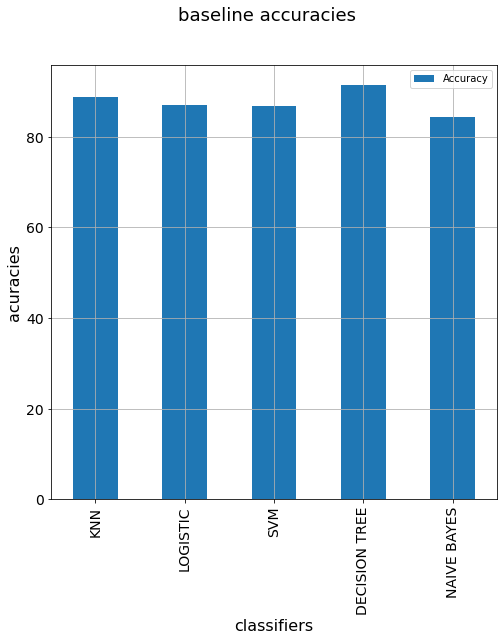

In [177]:
acc_data=[baseline_accuracy[0],baseline_accuracy[1],baseline_accuracy[2],baseline_accuracy[3],baseline_accuracy[4]]
baseline_models=["KNN","LOGISTIC","SVM","DECISION TREE","NAIVE BAYES"]
acc_data = [round(item, 2) for item in acc_data]
acc_df=pd.DataFrame( {
'Accuracy': acc_data,
'Classifier': baseline_models,
})
ax=acc_df.plot.bar(y ='Accuracy', x='Classifier',figsize=(8, 8))
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.suptitle("baseline accuracies",fontsize="18")
plt.xlabel("classifiers",fontsize="16")
plt.ylabel("acuracies",fontsize="16")
plt.grid()
plt.show()

In [178]:

best_baseline_acc=baseline_accuracy[np.argmax(baseline_accuracy)]
best_baseline_model=baseline_models[np.argmax(baseline_accuracy)]


print("best baseline accuracy is ",best_baseline_acc," with  model ",best_baseline_model)

best baseline accuracy is  91.36546184738957  with  model  DECISION TREE


### Q1 conclusion
 ***DecisionTreeClassifier gives Highest Baseline accuracy=91.36%***


**6. Feature Selection**

      PCA
      Autoencoder
      FILTER
      WRAPPER


###PCA

In [179]:
models= [tree]

In [180]:
def model_pca(model,model_accuracy,features):
  model.fit(x_train_transform, y_train.values.ravel())
  pred_model=model.predict(x_test_transform)
  acc1=accuracy_score(y_test.values.ravel(),pred_model)*100
  model_accuracy.append(acc1)
  

In [181]:
tree_accuracy_pca=[]
for i in range(1,11):
  pca = PCA(i,random_state=24)
  # fit on data
  pca.fit(x_train)
  # transform data
  x_train_transform = pca.transform(x_train)
  x_test_transform=pca.transform(x_test)
  model_pca(tree,tree_accuracy_pca,i)
  

In [182]:

print("\n TREE_PCA_accuracy \n",tree_accuracy_pca)




 TREE_PCA_accuracy 
 [80.80321285140563, 82.7710843373494, 83.81526104417671, 85.42168674698796, 85.02008032128514, 84.97991967871485, 86.8273092369478, 90.96385542168674, 91.12449799196787, 90.24096385542168]


In [190]:
best_pca_acc=tree_accuracy_pca[np.argmax(tree_accuracy_pca)]
best_pca_features=np.argmax(tree_accuracy_pca)
print("best pca accuracy ",best_pca_acc," with principle components ",best_pca_features)

best pca accuracy  91.12449799196787  with principle components  8


In [184]:
#x_arr=x.reshape(-1,1)
pca = PCA() #If we do not specify how many components, all are included
X_r = pca.fit(x_train).transform(x_train)

In [186]:
print('\nEigenvalues \n%s' %pca.explained_variance_)
#print('Eigenvectors \n%s' %pca.components_)


Eigenvalues 
[1.59279598e-01 1.41981426e-01 1.29013154e-01 1.02110302e-01
 8.65874415e-02 8.45352023e-02 6.79791635e-02 4.87318627e-02
 4.46388555e-02 2.60331246e-05]


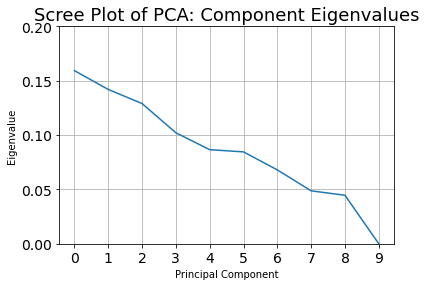

In [187]:
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

ax = figure().gca()
ax.plot(pca.explained_variance_)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim([0, 0.2])
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
plt.title('Scree Plot of PCA: Component Eigenvalues')
plt.grid()
plt.show()

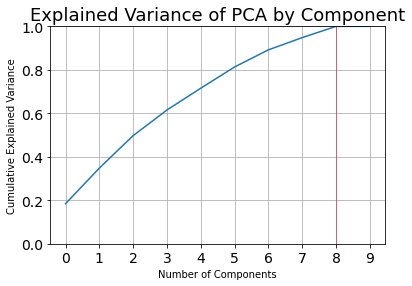

In [189]:
import numpy as np
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
#print(np.cumsum(pca.explained_variance_ratio_))
ax = figure().gca()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylim([0, 1])
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=8, linewidth=1, color='r', alpha=0.5)
#plt.axhline(y=0.96, linewidth=1, color='r', alpha=0.5)
plt.title('Explained Variance of PCA by Component')
plt.grid()
plt.show()


AUTOENCODING FOR FEATURE REDUCTION
 

###keras auto encoder

In [191]:
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam


In [192]:
#scaled_data=x_train
two=[12,24,12,6,2,6,12,24,12]
four=[12,32,16,8,4,8,16,32,12]
six=[12,36,24,12,6,12,2,36,12]
eight=[12,32,24,16,8,16,24,32,12]
ten=[12,60,40,20,10,20,40,60,12]
models_list=[two,four,six,eight,ten]
encoders_train=np.empty(5, dtype=object)
encoders_test=np.empty(5, dtype=object)
for i in range(len(models_list)):
    #nn="NN"+str(i)
    nn = Sequential()
    nn.add(Dense(models_list[i][0],  activation='elu', input_shape=(10,)))
    nn.add(Dense(models_list[i][1],  activation='elu'))
    nn.add(Dense(models_list[i][2],  activation='elu'))
    nn.add(Dense(models_list[i][3],  activation='elu'))
    nn.add(Dense(models_list[i][4],    activation='linear', name="bottleneck"))
    nn.add(Dense(models_list[i][5],  activation='elu'))
    nn.add(Dense(models_list[i][6],  activation='elu'))
    nn.add(Dense(models_list[i][7],  activation='sigmoid'))
    nn.add(Dense(models_list[i][8],  activation='elu'))

    nn.compile(loss='mean_squared_error', optimizer = Adam())
    history = nn.fit(x_train, y_train, batch_size=64,epochs=1)
    encoder = Model(nn.input, nn.get_layer('bottleneck').output)
   
    x_train_encode = encoder.predict(x_train)
    
    encoders_train[i]=x_train_encode
    x_test_encode = encoder.predict(x_test)
    encoders_test[i]=x_test_encode
    



78/78 [==============================] - 0s 1ms/step


In [193]:
tree_accuracy_encode=np.empty(5, dtype=float)
models= [tree]
for i in range(0,5):
    model.fit(encoders_train[i], y_train)
        # make predictions on the test set
    y_pred_encode = model.predict(encoders_test[i])
        #acc="acc_encode"+str(i)
    acc = accuracy_score(y_test, y_pred_encode)*100
    tree_accuracy_encode[i]=acc
        

In [194]:
best_encode_acc=tree_accuracy_encode[np.argmax(tree_accuracy_encode)]
best_encode_features=2*np.argmax(tree_accuracy_encode)+2
print("best Autoencoder accuracy ",best_encode_acc," with encoded features ",best_encode_features)

best Autoencoder accuracy  86.62650602409639  with encoded features  2


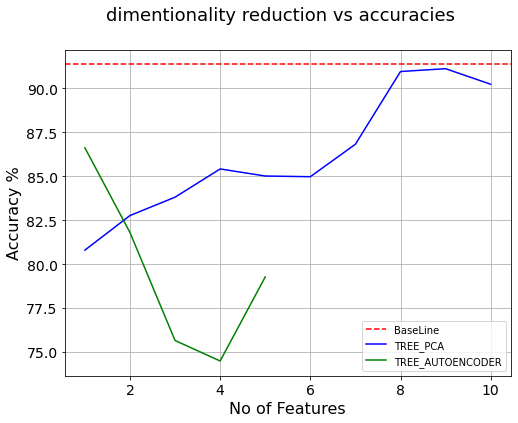

In [198]:
x_ax1 = [1, 2, 3, 4, 5, 6,7,8,9,10]
x_ax2=[1,2,3,4,5]
plt.figure(figsize=(8, 6))
plt.axhline(best_baseline_acc, color='r', linestyle='--')
plt.plot(x_ax1, tree_accuracy_pca,color='blue')
plt.plot(x_ax2, tree_accuracy_encode,color='green')
plt.xlabel("No of Features",fontsize="16")
plt.ylabel("Accuracy %",fontsize="16")
plt.legend(["BaseLine","TREE_PCA","TREE_AUTOENCODER"], loc ="lower right")
plt.suptitle("dimentionality reduction vs accuracies",fontsize="18")
plt.grid()
plt.show()

###Filter

In [199]:
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SequentialFeatureSelector

### Function to Calculate Accuracy and Select Features for Filter methods

In [200]:
#input ML model,Features list,maximum features
def Filter_method(model,features,no_features):
  acc=[]
  selected_features=[]
  for i in range(1,no_features+1):
      selected_features.append(features[0:i:1])
      X_traini=x_train[features[0:i:1]]
      X_testi=x_test[features[0:i:1]]
      model.fit(X_traini,y_train.values.ravel())
      pred_clf=model.predict(X_testi)
      acc.append(accuracy_score(y_test,pred_clf)*100)
  return acc,selected_features
  #returns accuracies list and selected features list 

###Function to plot Filter Method Accuracies

In [216]:
def plot_Filter_features(clf1_acc,clf2_acc):
  x=[1,2,3,4,5,6,7,8,9,10]
  x1=[1,2,3,4,5,6,7]
  plt.figure(figsize = (8,6))
  plt.plot(x1, clf1_acc, label="VARIANCE")
  plt.plot(x, clf2_acc, label="INFO GAIN")
  plt.axhline(best_baseline_acc, color='r', linestyle='--')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xlabel('Number of Features',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.xticks([1,2,3,4,5,6,7,8,9,10])
  plt.title(" Filtered Feature Selection vs Accuracy",fontsize=18)
  plt.grid()
  plt.show()

###(a) Filter Methods -Information Gain

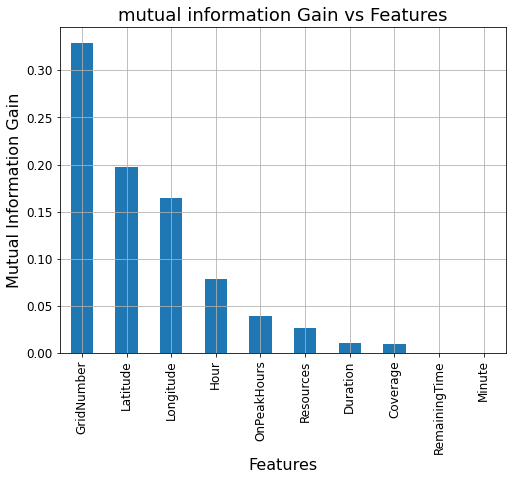

In [217]:
x=data_norm.iloc[:,:-1]
x=x.drop(["Day","ID"],axis='columns')
y=data_norm.iloc[ :, -1:]
#Get mutual information gain using sklearn.feature_selection/mutual_info_regression
mu_info = mutual_info_regression(x, y,random_state=24);
mu_info = pd.Series(mu_info)#make pandas series from mutual information
mu_info.index = x.columns #add feature names to information gain
# Plotting the mutual information
ax=mu_info.sort_values(ascending=False).plot.bar(fontsize=12,grid=True,figsize=(8, 6))# sortMutual info in descending order
ax.set_title("mutual information Gain vs Features",fontsize=18)
ax.set_xlabel("Features",fontsize=16)
ax.set_ylabel("Mutual Information Gain",fontsize=16)
plt.show()

In [226]:
#sort the  Features in descending order of mutual info gain values
sort_index=mu_info.sort_values(ascending=False).index 
li=sort_index.tolist()# Features list
models= [tree]
tree_accuracy_mi=[]
tree_features_mi=[]
tree_accuracy_mi,tree_features_mi=Filter_method(tree,li,10)


In [227]:
best_mi_acc=tree_accuracy_mi[np.argmax(tree_accuracy_mi)]
best_mi_features=tree_features_mi[np.argmax(tree_accuracy_mi)]
print("best Feature Info gain accuracy ",best_mi_acc," with  features ",best_mi_features)

best Feature Info gain accuracy  93.29317269076304  with  features  ['GridNumber', 'Latitude', 'Longitude', 'Hour', 'OnPeakHours']


###(a) Filter Methods -VARIANCE Threshold

In [220]:
x.var(axis=0)

Latitude         0.072502
Longitude        0.049405
Hour             0.080825
Minute           0.086509
Duration         0.084228
RemainingTime    0.089927
Resources        0.102262
Coverage         0.084194
OnPeakHours      0.149409
GridNumber       0.069862
dtype: float64

### If we select Varince threshold as 0.080 we can select seven features

In [221]:
selector = VarianceThreshold(threshold = 0.080)
selector = selector.fit(x)
data_var=x[x.columns[selector.get_support(indices=True)]] #make dataframe with columns whose variance>0.080

In [222]:
tree_accuracy_var=[]
tree_features_var=[]
tree_accuracy_var,tree_features_var=Filter_method(tree,data_var.columns.tolist(),len(selector.get_support(indices=True)))


In [223]:
best_var_acc=tree_accuracy_var[np.argmax(tree_accuracy_var)]
best_var_features=tree_features_var[np.argmax(tree_accuracy_var)]
print("best Feature variance accuracy ",best_var_acc," with  features ",best_var_features)

best Feature variance accuracy  86.94779116465864  with  features  ['Hour']


### Select Filter method with maximum accuracy

###(b) Plot the Filter methods number of features versus accuracy graph 

In [224]:
print(tree_accuracy_var)

[86.94779116465864, 85.3012048192771, 81.04417670682732, 81.56626506024097, 82.65060240963855, 83.21285140562249, 84.0160642570281]


In [228]:
print(tree_accuracy_mi)

[86.94779116465864, 86.86746987951808, 89.71887550200803, 92.28915662650601, 93.29317269076304, 92.61044176706828, 92.69076305220884, 91.72690763052209, 91.4859437751004, 91.6867469879518]


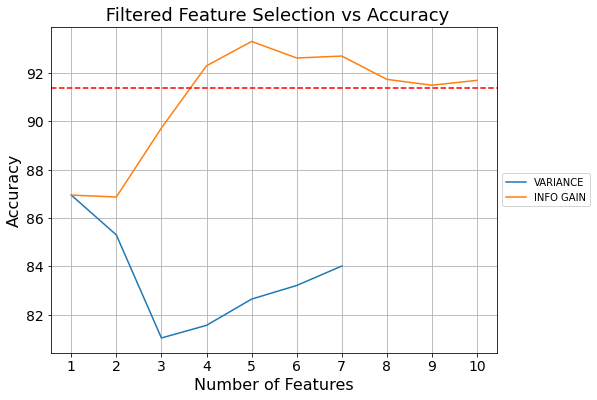

In [229]:
plot_Filter_features(tree_accuracy_var,tree_accuracy_mi)


###(b)Wrapper Methods (Forward or Backward Feature Elimination.

In [60]:
#function for Forward or Backward Feature Elimination
def FeatureSelect(model,dir,features):
  sfs1 = SequentialFeatureSelector(model, direction=dir, n_features_to_select= features)
  sfs1.fit(x_train, y_train.values.ravel())
  summary_f = sfs1.get_feature_names_out() #Forward or Backward Feature Elimination selected feature names
  x_train1=sfs1.transform(x_train)
  model.fit(x_train1,y_train.values.ravel())
  sfs1.fit(x_test,y_test.values.ravel())
  x_test1=sfs1.transform(x_test)
  pred_clf=model.predict(x_test1)
  acc=accuracy_score(y_test.values.ravel(),pred_clf)*100
  return summary_f,acc
#returns selected features and accuracy

In [61]:
def plot_wrappers_accuracy(clf1_acc,clf2_acc):
  x=[1,2,3,4,5,6,7,8,9,10]
  plt.figure(figsize = (8,6))
  plt.plot(x, clf1_acc, label="FORWARDELIMINATION")
  plt.plot(x, clf2_acc, label="BAKWARD ELIMINTION")
  plt.axhline(best_baseline_acc, color='r', linestyle='--')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xlabel('Number of Features')
  plt.ylabel('Accuracy')
  plt.xticks([1,2,3,4,5,6,7,8,9,10])
  plt.title(" WRAPPER Feature Selection vs Accuracy")
  plt.grid()
  plt.show()

###(b)Wrapper Methods-Forward Feature Elimination

In [62]:
def fwd_acc_features(model,features,accu):
   for i in range(1,11):
       summary_f,acc=FeatureSelect(model,'forward',i)
       features.append(summary_f)
       accu.append(acc)

In [63]:
def bk_acc_features(model,features,accu):
   for i in range(10,0,-1):
       summary_f,acc=FeatureSelect(model,'backward',i)
       features.append(summary_f)
       accu.append(acc)

In [64]:
#Forward Feature Elimination for logistic regression and Knearest neighbours

tree_accuracy_fwd=[] #KNN accuracies

tree_fwd_select_features=[] #KNN forward feature elimination selected features

models= [tree]

fwd_acc_features(tree,tree_fwd_select_features,tree_accuracy_fwd)



###(b)Wrapper Methods- Backward Feature Elimination

In [65]:
#Backward Feature Elimination 

tree_accuracy_back=[] #KNN accuracies

tree_bk_select_features=[] #KNN forward feature elimination selected features

models= [tree]

bk_acc_features(tree,tree_bk_select_features,tree_accuracy_back)

  

In [66]:
# reverse accuracies and selected features as backward feature elimination strts with all features
tree_accuracy_back.reverse()

tree_bk_select_features.reverse()


In [67]:
print("\n TREE_accuracy_fwd \n",tree_accuracy_fwd)

print("\n TREE_accuracy_back \n",tree_accuracy_back)



 TREE_accuracy_fwd 
 [86.94779116465864, 86.94779116465864, 83.4136546184739, 82.81124497991968, 81.40562248995984, 89.5582329317269, 87.99196787148594, 88.79518072289156, 90.52208835341365, 82.73092369477911]

 TREE_accuracy_back 
 [79.43775100401606, 85.94377510040161, 82.69076305220884, 81.4859437751004, 89.67871485943775, 89.51807228915662, 88.07228915662651, 82.570281124498, 85.18072289156626, 82.73092369477911]


In [68]:
best_fwd_acc=tree_accuracy_fwd[np.argmax(tree_accuracy_fwd)]
best_fwd_features=tree_fwd_select_features[np.argmax(tree_accuracy_fwd)]
print("best fwd accuracy ",best_fwd_acc," with  features ",best_fwd_features)

best fwd accuracy  90.52208835341365  with  features  ['Latitude' 'Longitude' 'Hour' 'Minute' 'Duration' 'RemainingTime'
 'Coverage' 'OnPeakHours' 'GridNumber']


In [69]:
best_bk_acc=tree_accuracy_back[np.argmax(tree_accuracy_back)]
best_bk_features=tree_bk_select_features[np.argmax(tree_accuracy_back)]
print("best bk accuracy ",best_bk_acc," with  features ",best_bk_features)

best bk accuracy  89.67871485943775  with  features  ['Latitude' 'Longitude' 'Minute' 'RemainingTime' 'GridNumber']


###(b) Plot the Wrapper methods number of features versus accuracy graph 

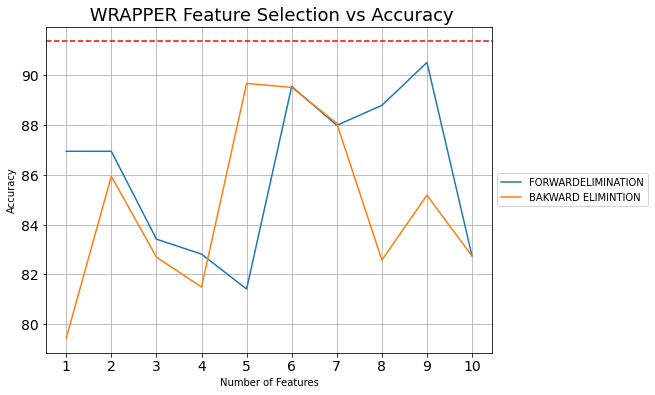

In [230]:
plot_wrappers_accuracy(tree_accuracy_fwd,tree_accuracy_back)

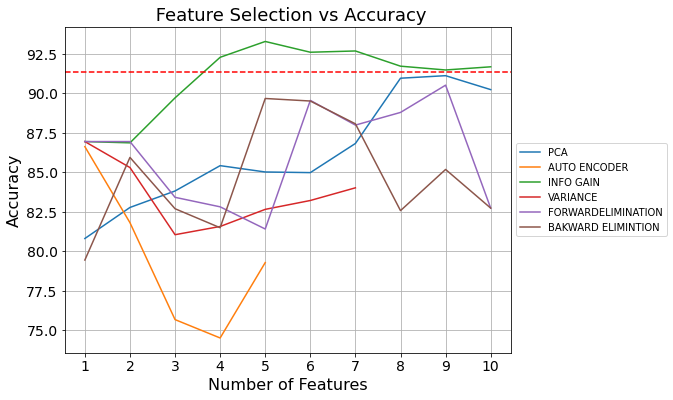

In [234]:
x=[1,2,3,4,5,6,7,8,9,10]
x1=[1,2,3,4,5,6,7,8,9,10]
x2=[1,2,3,4,5,6,7]
x_ax1 = [1, 2, 3, 4, 5, 6,7,8,9,10]
x_ax2=[1,2,3,4,5]
plt.figure(figsize = (8,6))
plt.plot(x_ax1, tree_accuracy_pca,label="PCA")
plt.plot(x_ax2, tree_accuracy_encode,label="AUTO ENCODER")
plt.plot(x1, tree_accuracy_mi, label="INFO GAIN")
plt.plot(x2, tree_accuracy_var, label="VARIANCE")
plt.plot(x, tree_accuracy_fwd, label="FORWARDELIMINATION")
plt.plot(x, tree_accuracy_back, label="BAKWARD ELIMINTION")
plt.axhline(best_baseline_acc, color='r', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Number of Features',fontsize="16")
plt.ylabel('Accuracy',fontsize="16")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title(" Feature Selection vs Accuracy",fontsize="18")
plt.grid()
plt.show()

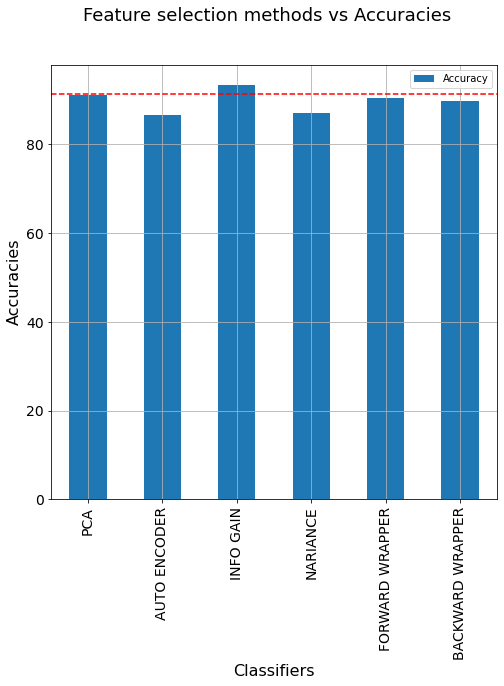

In [257]:
acc_data=[best_pca_acc,best_encode_acc,best_mi_acc,best_var_acc,best_fwd_acc,best_bk_acc]
feature_select_methods=["PCA","AUTO ENCODER","INFO GAIN","NARIANCE","FORWARD WRAPPER","BACKWARD WRAPPER"]
acc_data = [round(item, 2) for item in acc_data]
acc_df=pd.DataFrame( {
'Accuracy': acc_data,
'Classifier': feature_select_methods,
})
ax=acc_df.plot.bar(y ='Accuracy', x='Classifier',figsize=(8, 8))
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.axhline(best_baseline_acc, color='r', linestyle='--')
plt.suptitle("Feature selection methods vs Accuracies",fontsize="18")
plt.xlabel("Classifiers",fontsize="16")
plt.ylabel("Accuracies",fontsize="16")
plt.grid()
plt.show()

In [73]:
best_features_acc=acc_data[np.argmax(acc_data)]
best_features_method=feature_select_methods[np.argmax(acc_data)]
print("best Features accuracy ",best_features_acc," with   ",best_features_method)

best Features accuracy  92.93  with    INFO GAIN


In [238]:
x_best_train=x_train[['GridNumber', 'Latitude', 'Longitude', 'Hour', 'OnPeakHours']] 
x_best_test=x_test[['GridNumber', 'Latitude', 'Longitude', 'Hour', 'OnPeakHours']]



best  accuracy of DECISION TREE CLASSIFIER  93.29317269076304  with Info gain features = ['GridNumber', 'Latitude', 'Longitude', 'Hour', 'OnPeakHours']

 CONFUSION MATRIX 



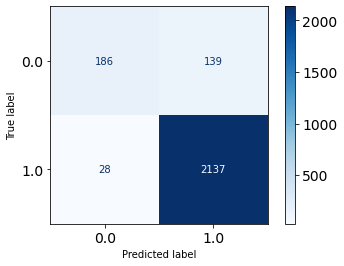

In [239]:
tree.fit(x_best_train, y_train.values.ravel()) # fit the model
y_pred= tree.predict(x_best_test) # then predict on the test set
accuracy= accuracy_score(y_test, y_pred)*100 # this gives us how often the algorithm predicted correctly
Q2_accuracy=accuracy
print("\n")
print("best  accuracy of DECISION TREE CLASSIFIER ",Q2_accuracy," with Info gain features =",best_mi_features)
print("\n CONFUSION MATRIX \n")
plot_confusion_matrix(tree, x_best_test, y_test, cmap=plt.cm.Blues)
plt.show()
    

In [240]:
#apply TSNE on training data
x_train_tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300,random_state=24).fit_transform(x_best_train) 

In [241]:
#apply TSNE on testing data
x_test_tsne=TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300,random_state=24).fit_transform(x_best_test)


In [242]:
#use KMeans clusteringr on TSNE training data and test data

tree.fit(x_train_tsne,y_train)
pred_train = tree.predict(x_train_tsne)
pred_test = tree.predict(x_test_tsne)

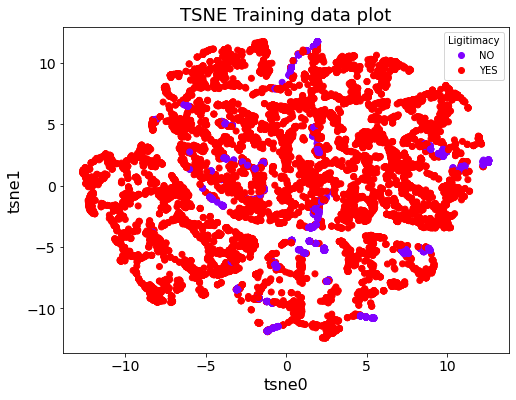

In [243]:
#plot Actual vs Predicted classes in training data
plt.subplots(figsize=(8,6))
train_col=y_train.to_numpy()
scatter=plt.scatter(x=x_train_tsne[:, 0], y=x_train_tsne[:, 1],c=train_col,cmap='rainbow')
plt.title('TSNE Training data plot',fontsize=18)
plt.xlabel("tsne0",fontsize=16)
plt.ylabel("tsne1",fontsize=16)
plt.legend(handles=scatter.legend_elements()[0], labels=['NO','YES'],title="Ligitimacy")
plt.show()

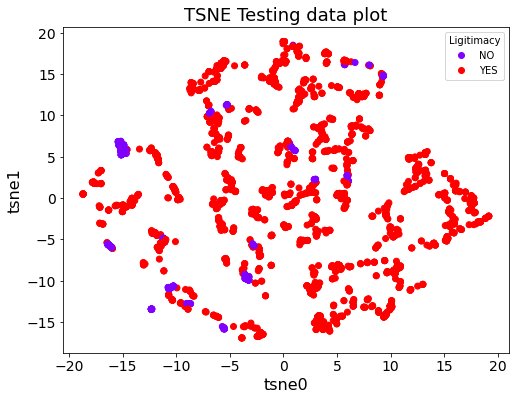

In [244]:
#plot Actual vs Predicted classes in testing data
plt.subplots(figsize=(8,6))
test_col=y_test.to_numpy()
scatter=plt.scatter(x=x_test_tsne[:, 0], y=x_test_tsne[:, 1], c=test_col,cmap='rainbow')
plt.title('TSNE Testing data plot',fontsize=18)
plt.xlabel("tsne0",fontsize=16)
plt.ylabel("tsne1",fontsize=16)
plt.legend(handles=scatter.legend_elements()[0], labels=['NO','YES'],title="Ligitimacy")
plt.show()


###ENSEMBLE

bagging accuracy   93.21285140562249


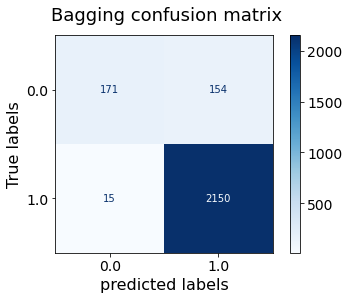

In [260]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1000, bootstrap=True,random_state=42)
bagging_clf.fit(x_best_train, y_train.values.ravel())
y_pred = bagging_clf.predict(x_best_test)
bagging_accuracy= accuracy_score(y_test, y_pred)*100
print("bagging accuracy  ",bagging_accuracy)
plot_confusion_matrix(bagging_clf, x_best_test, y_test, cmap=plt.cm.Blues)
plt.suptitle("Bagging confusion matrix",fontsize="18")
plt.xlabel("predicted labels",fontsize="16")
plt.ylabel("True labels",fontsize="16")
plt.show()

Random Forest accuracy  92.16867469879519


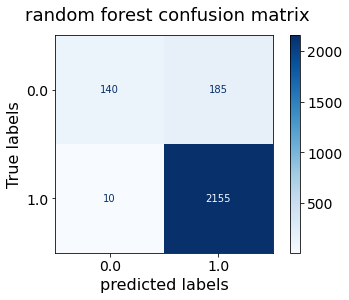

In [261]:

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(x_best_train, y_train)
y_pred =rf_clf.predict(x_best_test)
forest_accuracy= accuracy_score(y_test, y_pred)*100
print("Random Forest accuracy ",forest_accuracy)
plot_confusion_matrix(rf_clf, x_best_test, y_test, cmap=plt.cm.Blues)
plt.suptitle("random forest confusion matrix",fontsize="18")
plt.xlabel("predicted labels",fontsize="16")
plt.ylabel("True labels",fontsize="16")
plt.show()

ADABOOST accuracy  88.47389558232932


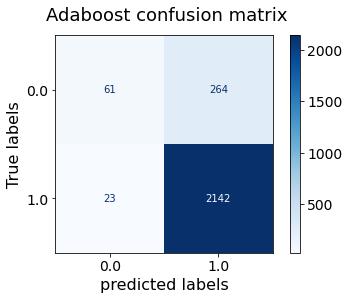

In [262]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=1000)
ada_boost_clf.fit(x_best_train, y_train)
y_pred = ada_boost_clf.predict(x_best_test)
adaboost_accuracy= accuracy_score(y_test, y_pred)*100
print("ADABOOST accuracy ",adaboost_accuracy)
plot_confusion_matrix(ada_boost_clf, x_best_test, y_test, cmap=plt.cm.Blues)
plt.suptitle("Adaboost confusion matrix",fontsize="18")
plt.xlabel("predicted labels",fontsize="16")
plt.ylabel("True labels",fontsize="16")

plt.show()

gradient Boosting accuracy  91.80722891566265


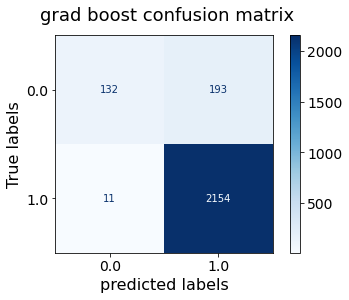

In [263]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=1000, random_state=42)
grad_boost_clf.fit(x_best_train, y_train)
y_pred = grad_boost_clf.predict(x_best_test)
grad_boost_accuracy= accuracy_score(y_test, y_pred)*100
print("gradient Boosting accuracy ",grad_boost_accuracy)
plot_confusion_matrix(grad_boost_clf, x_best_test, y_test, cmap=plt.cm.Blues)
plt.suptitle("grad boost confusion matrix",fontsize="18")
plt.xlabel("predicted labels",fontsize="16")
plt.ylabel("True labels",fontsize="16")

plt.show()

voting accuracy  91.16465863453816


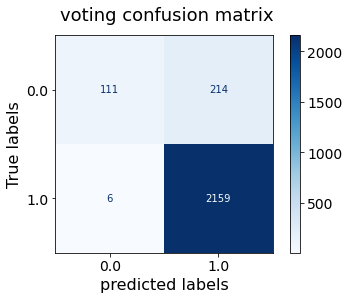

In [264]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
#log_reg = LogisticRegression(solver='liblinear')
estimators.append(('KNN', knn))
estimators.append(('Logistic', logistic))
estimators.append(('SVM', svm))
estimators.append(('Tree', tree))
estimators.append(('NB', naive_bayes))
#tree = DecisionTreeClassifier()


#svm_clf = SVC(gamma='scale')

voting = VotingClassifier(estimators=estimators)
voting.fit(x_best_train, y_train)
y_pred = voting.predict(x_best_test)
voting_accuracy= accuracy_score(y_test, y_pred)*100
print("voting accuracy ",voting_accuracy)
plot_confusion_matrix(voting, x_best_test, y_test, cmap=plt.cm.Blues)
plt.suptitle("voting confusion matrix",fontsize="18")
plt.xlabel("predicted labels",fontsize="16")
plt.ylabel("True labels",fontsize="16")

plt.show()

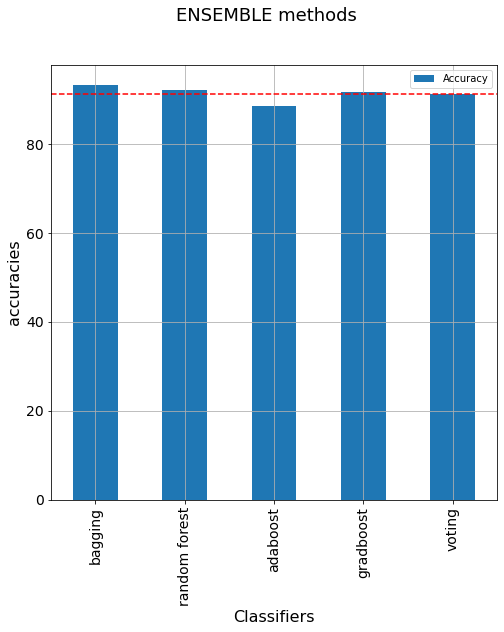

In [265]:
acc_data=[bagging_accuracy,forest_accuracy,adaboost_accuracy,grad_boost_accuracy,voting_accuracy]
ensemble_methods=["bagging","random forest","adaboost","gradboost","voting"]
acc_data = [round(item, 2) for item in acc_data]
acc_df=pd.DataFrame( {
'Accuracy': acc_data,
'Classifier': ensemble_methods,
})
ax=acc_df.plot.bar(y ='Accuracy', x='Classifier',figsize=(8, 8))
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.axhline(best_baseline_acc, color='r', linestyle='--')
plt.suptitle("ENSEMBLE methods",fontsize="18")
plt.xlabel("Classifiers",fontsize="16")
plt.ylabel("accuracies",fontsize="16")

plt.grid()
plt.show()

In [266]:
best_ensemble_acc=acc_data[np.argmax(acc_data)]
best_ensemble_method=ensemble_methods[np.argmax(acc_data)]
print("best ensemble accuracy ",best_ensemble_acc," with   ",best_ensemble_method)

best ensemble accuracy  93.21  with    bagging


**7. HYPER Parameter Tuning**

     GRID SEARCHCV


###Parameters

In [267]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [268]:
tree_param_grid = {'max_depth': (2,4,6,8,10),
             'criterion': ('gini','entropy'),
             'min_samples_leaf' : (1,2,3,4,5),
             'max_leaf_nodes' : (3,4,5,6,7,8,9,10)
        
             }

In [269]:
params=[tree_param_grid]
models=[tree]


In [270]:
gridsearch_accuracy=np.empty(1, dtype=float, order='C')
grid_models=np.array(["TREE_grid","EX_TREE"])
gridsearch_estimators=np.empty(1, dtype=object)



In [271]:
def gridsearch(models,params):
    for i in range(0,1):
        print("---------------------------------")
        grid_search = GridSearchCV(estimator = models[i],param_grid = params[i],scoring = 'accuracy',cv = 5,verbose=0)
        grid_search.fit(x_best_train, y_train.values.ravel())
        print("tuned  parameters: {}" .format(grid_search.best_params_))
        print("best score: {}" .format(grid_search.best_score_))
        print("best estimator: {}" .format(grid_search.best_estimator_))
        gridsearch_accuracy[i]=grid_search.best_score_*100
        gridsearch_estimators[i]=grid_search.best_estimator_
    return grid_search.cv_results_

In [272]:
grid_results=gridsearch(models,params)

---------------------------------
tuned  parameters: {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 1}
best score: 0.890694760570588
best estimator: DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5)


In [273]:
criterion_list = ['gini','entropy']
max_depth_list=[2,4,6,8,10]
max_leaf_nodes_list=[3,4,5,6,7,8,9,10]
min_samples_leaf_list=[1,2,3,4,5]
grid_scores=grid_results['mean_test_score']

gini_index=[i for i, d in enumerate(grid_results['params']) if 'gini' in d.values()]
gini_scores=np.take(grid_scores, gini_index, axis=0)*100

entropy_index=[i for i, d in enumerate(grid_results['params']) if 'entropy' in d.values()]
entropy_scores=np.take(grid_scores, entropy_index, axis=0)*100

maxdepth2_index=[i for i, d in enumerate(grid_results['params']) if  d['max_depth']==2]
maxdepth2_scores=np.take(grid_scores, maxdepth2_index, axis=0)*100
maxdepth10_index=[i for i, d in enumerate(grid_results['params']) if  d['max_depth']==10]
maxdepth10_scores=np.take(grid_scores, maxdepth10_index, axis=0)*100

max_leaf_nodes10_index=[i for i, d in enumerate(grid_results['params']) if  d['max_leaf_nodes']==10]
max_leaf_nodes10_scores=np.take(grid_scores, max_leaf_nodes10_index, axis=0)*100
min_samples_leaf10_index=[i for i, d in enumerate(grid_results['params']) if  d['min_samples_leaf']==5]
min_samples_leaf10_scores=np.take(grid_scores, min_samples_leaf10_index, axis=0)*100


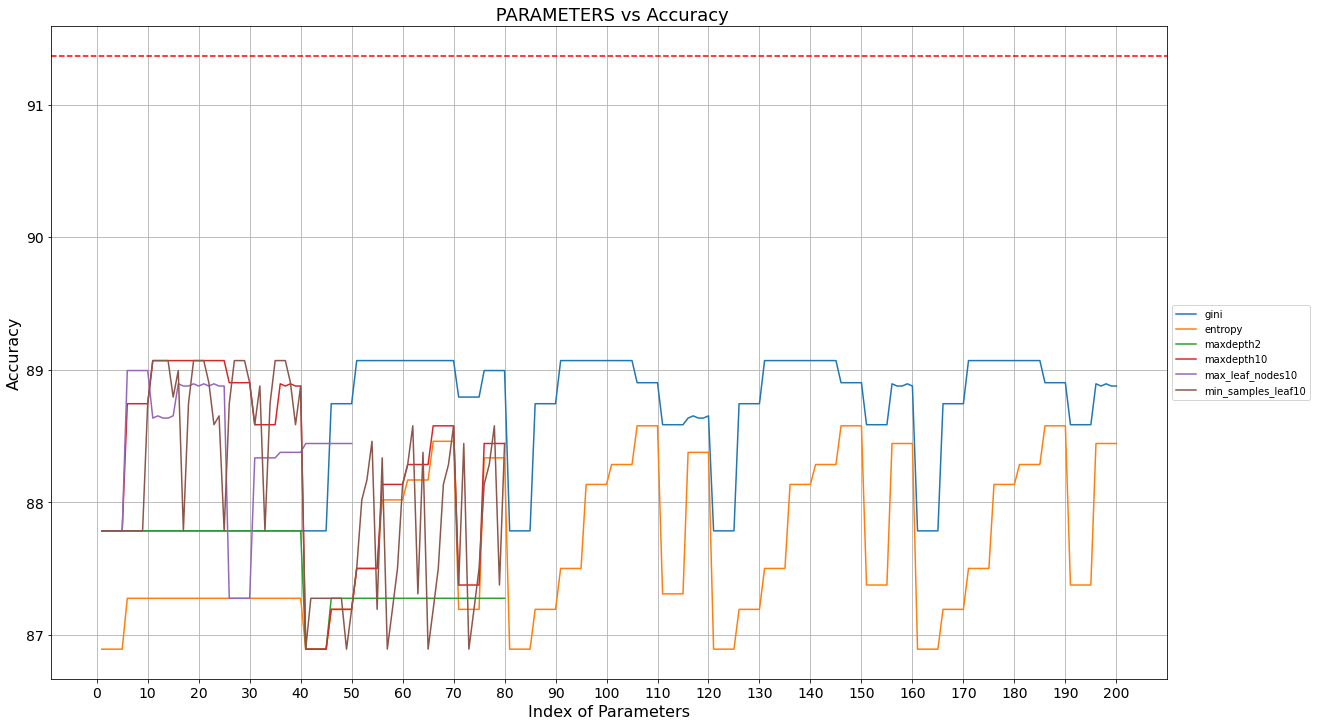

In [286]:
x1=list(range(1, 201))
x2=list(range(1, 81))
x3=list(range(1, 51))

plt.figure(figsize = (20,12))
plt.plot(x1, gini_scores, label="gini")
plt.plot(x1, entropy_scores, label="entropy")
plt.plot(x2, maxdepth2_scores, label="maxdepth2")
plt.plot(x2, maxdepth10_scores, label="maxdepth10")
plt.plot(x3, max_leaf_nodes10_scores, label="max_leaf_nodes10")
plt.plot(x2, min_samples_leaf10_scores, label="min_samples_leaf10")
plt.axhline(best_baseline_acc, color='r', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Index of Parameters',fontsize="16")
plt.ylabel('Accuracy',fontsize="16")
xmarks=[i for i in range(0,201,10)]
plt.xticks(xmarks)
plt.title(" PARAMETERS vs Accuracy")
plt.grid()
plt.show()

In [275]:
best_gridsearch_acc=gridsearch_accuracy[np.argmax(gridsearch_accuracy)]
best_gridsearch_params=gridsearch_estimators[np.argmax(gridsearch_accuracy)]
print("best gridsearch accuracy ",best_gridsearch_acc," with  parameters ",best_gridsearch_params)

best gridsearch accuracy  89.06947605705881  with  parameters  DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5)


In [276]:
rndm_search_accuracy=np.empty(1, dtype=float, order='C')
rndm_search_models=np.array(["TREE_rndm"])
rndm_search_estimators=np.empty(1, dtype=object)


In [277]:
def Randomsearch(models,params):
    for i in range(0,1):
        print("---------------------------------")
        rndm_search = RandomizedSearchCV(estimator = models[i],param_distributions = params[i],scoring = 'accuracy',cv = 5,verbose=0)
        rndm_search.fit(x_train, y_train.values.ravel())
        print("tuned  parameters: {}" .format(rndm_search.best_params_))
        print("best score: {}" .format(rndm_search.best_score_))
        print("best estimator: {}" .format(rndm_search.best_estimator_))
        rndm_search_accuracy[i]=rndm_search.best_score_*100
        rndm_search_estimators[i]=rndm_search.best_estimator_
    return rndm_search.cv_results_

In [278]:
rndm_results=Randomsearch(models,params)

---------------------------------
tuned  parameters: {'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_depth': 10, 'criterion': 'gini'}
best score: 0.8900287546833698
best estimator: DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=3)


In [279]:
print(len(rndm_results['mean_test_score']))

10


In [280]:
print(rndm_results['params'])

[{'min_samples_leaf': 5, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}, {'min_samples_leaf': 5, 'max_leaf_nodes': 6, 'max_depth': 6, 'criterion': 'gini'}, {'min_samples_leaf': 3, 'max_leaf_nodes': 6, 'max_depth': 6, 'criterion': 'gini'}, {'min_samples_leaf': 1, 'max_leaf_nodes': 8, 'max_depth': 10, 'criterion': 'gini'}, {'min_samples_leaf': 3, 'max_leaf_nodes': 10, 'max_depth': 10, 'criterion': 'gini'}, {'min_samples_leaf': 4, 'max_leaf_nodes': 5, 'max_depth': 10, 'criterion': 'gini'}, {'min_samples_leaf': 5, 'max_leaf_nodes': 6, 'max_depth': 10, 'criterion': 'gini'}, {'min_samples_leaf': 1, 'max_leaf_nodes': 4, 'max_depth': 10, 'criterion': 'entropy'}, {'min_samples_leaf': 2, 'max_leaf_nodes': 7, 'max_depth': 6, 'criterion': 'entropy'}, {'min_samples_leaf': 1, 'max_leaf_nodes': 4, 'max_depth': 6, 'criterion': 'gini'}]


In [281]:
rndm_scores=rndm_results['mean_test_score']*100
print(rndm_scores)

[88.32742723 88.39412168 88.39412168 88.49422594 89.00287547 88.32742723
 88.39412168 86.89344775 88.21071193 86.92665939]


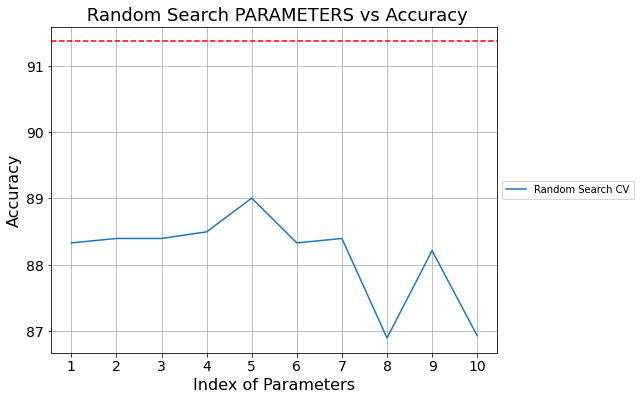

In [287]:
plt.figure(figsize = (8,6))
X=[1,2,3,4,5,6,7,8,9,10]
plt.plot(x, rndm_scores, label="Random Search CV")
plt.axhline(best_baseline_acc, color='r', linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Index of Parameters',fontsize="16")
plt.ylabel('Accuracy',fontsize="16")

xmarks=[i for i in range(1,11,1)]
plt.xticks(xmarks)
plt.title(" Random Search PARAMETERS vs Accuracy",fontsize='18')
plt.grid()
plt.show()

In [283]:
best_randomsearch_acc=rndm_search_accuracy[np.argmax(rndm_search_accuracy)]
best_randomsearch_params=rndm_search_estimators[np.argmax(rndm_search_accuracy)]
print("best Random search accuracy ",best_randomsearch_acc," with  parameters ",best_randomsearch_params)

best Random search accuracy  89.00287546833698  with  parameters  DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, min_samples_leaf=3)


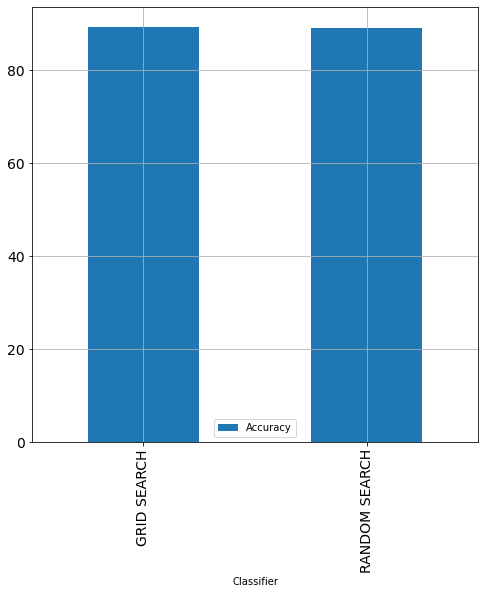

In [285]:
acc_data=[best_gridsearch_acc,best_randomsearch_acc]
search_methods=["GRID SEARCH","RANDOM SEARCH"]
acc_data = [round(item, 2) for item in acc_data]
acc_df=pd.DataFrame( {
'Accuracy': acc_data,
'Classifier': search_methods,
})
ax=acc_df.plot.bar(y ='Accuracy', x='Classifier',figsize=(8, 8))
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.grid()
plt.show()

In [288]:
best_search_acc=acc_data[np.argmax(acc_data)]
best_search_method=search_methods[np.argmax(acc_data)]
print("best search accuracy ",best_search_acc," with   ",best_search_method)

best search accuracy  89.07  with    GRID SEARCH


**8.Conclusion**

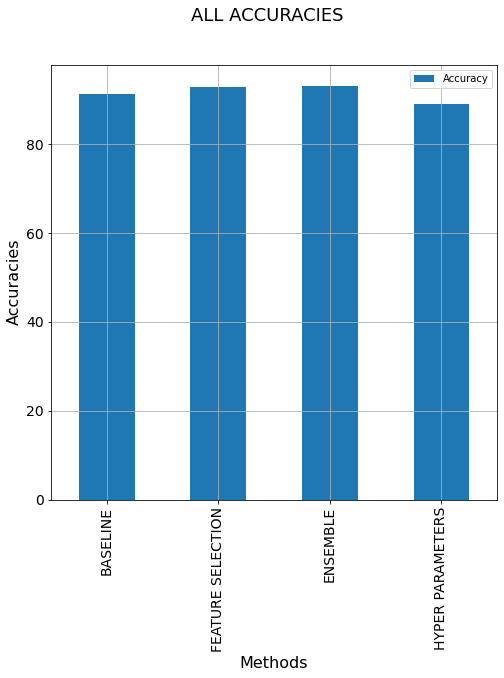

In [293]:
acc_data=[best_baseline_acc,best_features_acc,best_ensemble_acc,best_search_acc]
search_methods=["BASELINE","FEATURE SELECTION","ENSEMBLE","HYPER PARAMETERS"]
acc_data = [round(item, 2) for item in acc_data]
acc_df=pd.DataFrame( {
'Accuracy': acc_data,
'Classifier': search_methods,
})
ax=acc_df.plot.bar(y ='Accuracy', x='Classifier',figsize=(8, 8))
# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.suptitle("ALL ACCURACIES",fontsize="18")
plt.xlabel("Methods",fontsize="16")
plt.ylabel("Accuracies",fontsize="16")
plt.grid()
plt.show()

In [294]:
print("\n BEST BASELINE ACCURACY ",best_baseline_acc," with   ",best_baseline_model)
print("\n BEST FEATURE SELECTION ACCURACY ",best_features_acc," with   ",best_features_method)
print("\n BEST ENSEMBLE  ACCURACY ",best_ensemble_acc," with ",best_ensemble_method)
print("\n BEST HYPER PARAMETER TUNED ACCURACY  ",best_search_acc," with   ",best_search_method)



 BEST BASELINE ACCURACY  91.36546184738957  with    DECISION TREE

 BEST FEATURE SELECTION ACCURACY  92.93  with    INFO GAIN

 BEST ENSEMBLE  ACCURACY  93.21  with     with    bagging

 BEST HYPER PARAMETER TUNED ACCURACY   89.07  with    GRID SEARCH


**Conclusion**


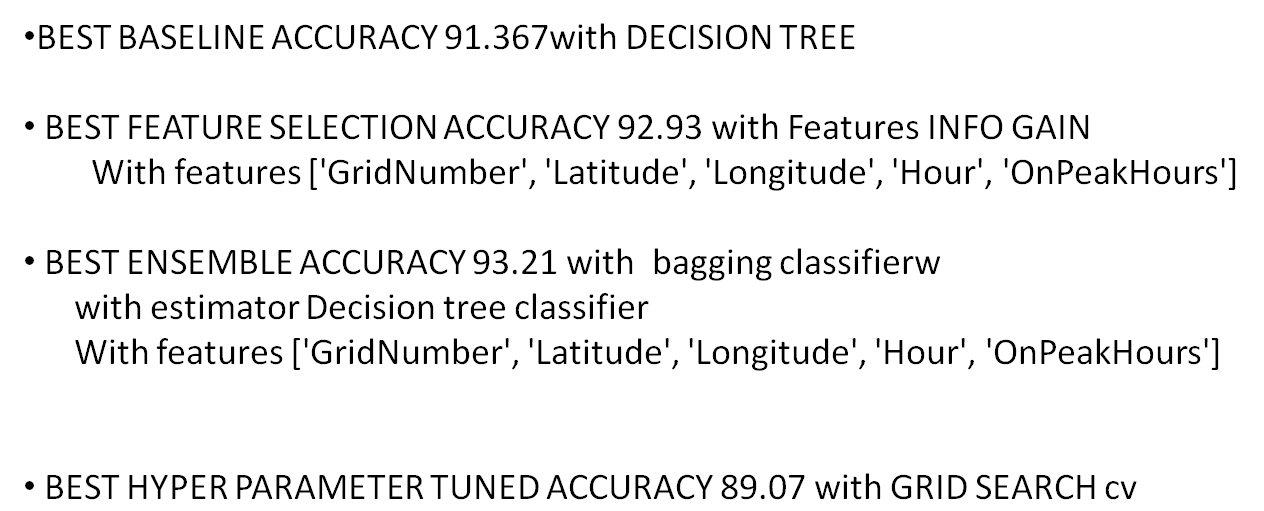